A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


        Distance  Body Battery       Sleep     stress  Total Ascent  \
count  40.000000     40.000000   40.000000  40.000000     40.000000   
mean    8.868250     56.625000  424.075000  24.625000     53.075000   
std     7.216006     12.943046   39.636416  10.337106     55.001346   
min     1.120000     36.000000  300.000000  12.000000      0.000000   
25%     5.010000     46.750000  400.000000  17.750000      5.750000   
50%     6.670000     53.500000  423.500000  21.000000     36.000000   
75%    10.010000     64.250000  445.500000  30.500000    106.250000   
max    42.770000     84.000000  509.000000  52.000000    205.000000   

       Total Descent  Temperature     Avg Pace  
count      40.000000     40.00000    40.000000  
mean       52.200000     16.25250   386.900000  
std        61.719049      6.38307   157.284945  
min         0.000000      4.80000   283.000000  
25%         2.000000     11.67500   319.000000  
50%        22.500000     16.35000   340.000000  
75%       106.500

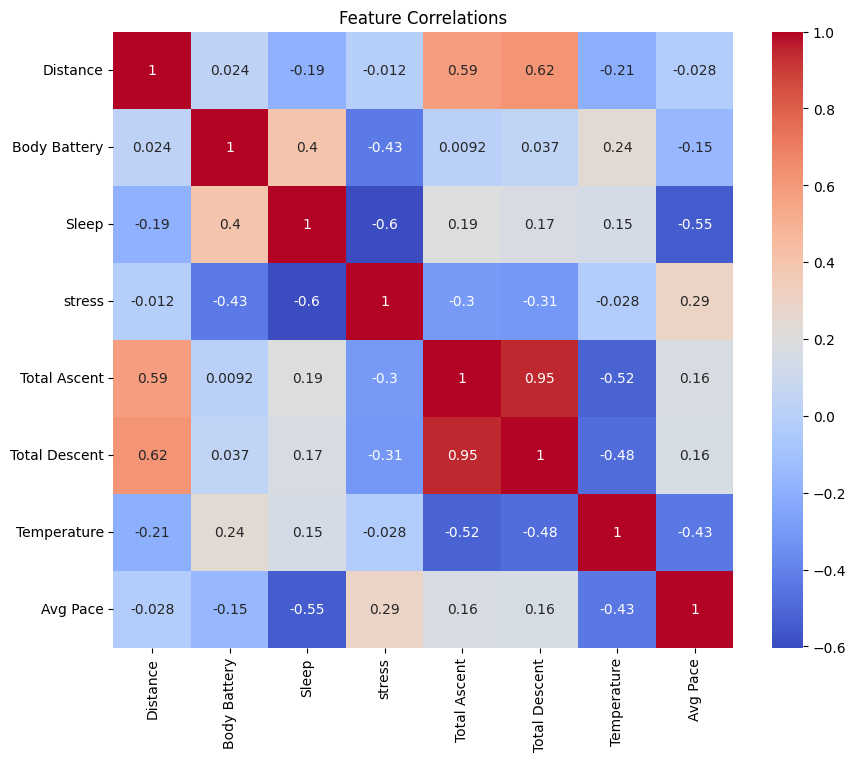

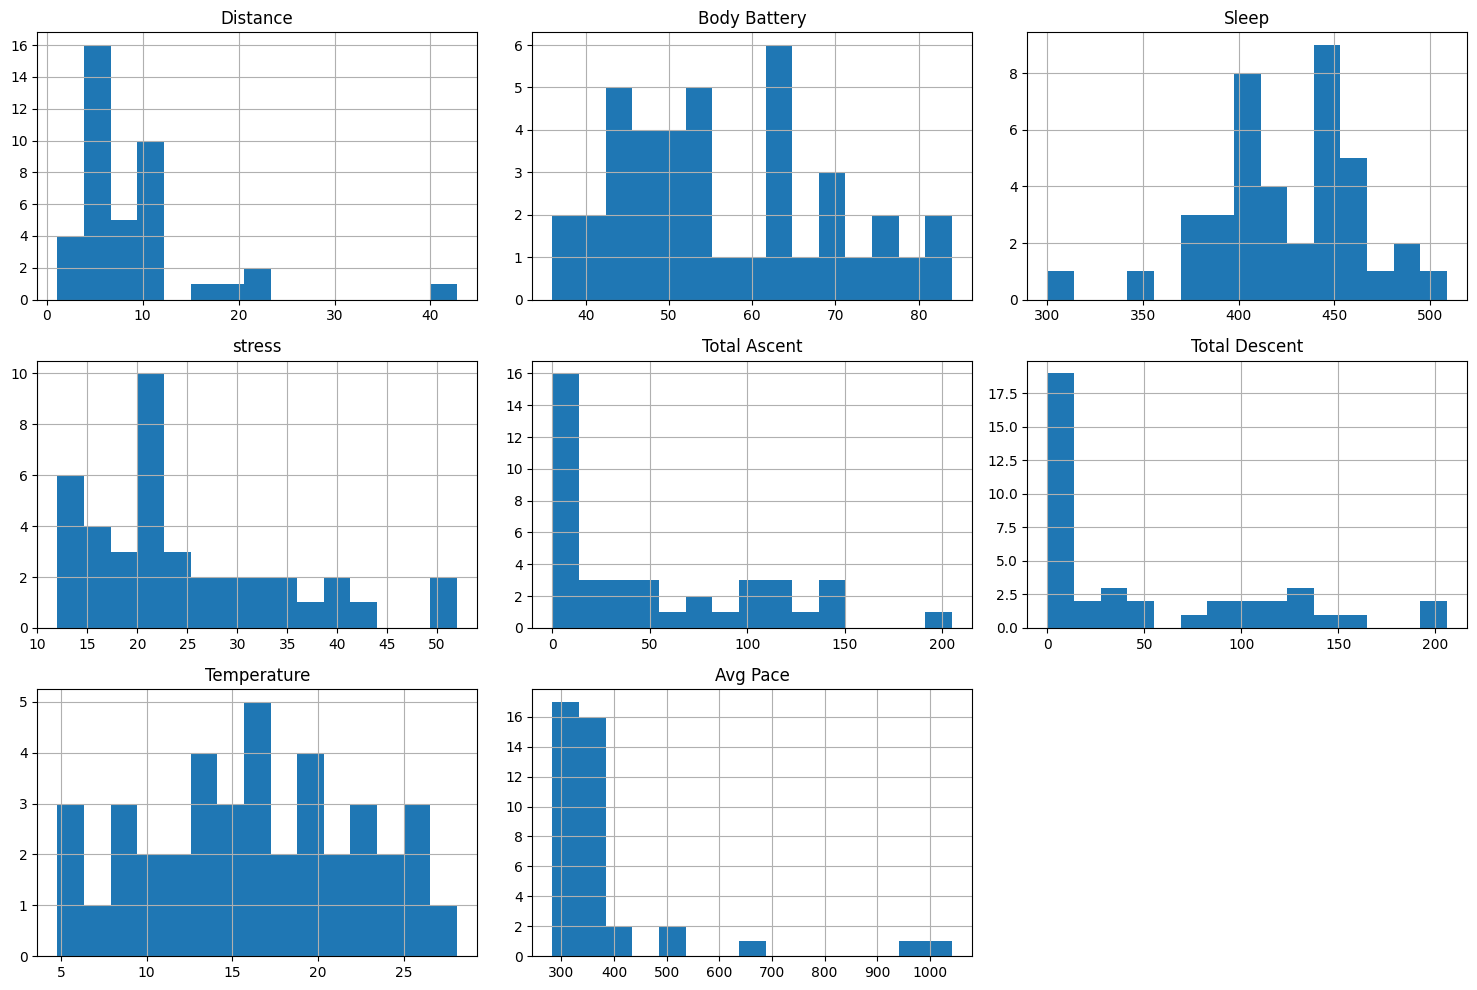

   Distance  Body Battery  Sleep  stress  Total Ascent  Total Descent  \
0      5.00            52    400      43            37             32   
1      5.01            62    430      20            22             20   
2      5.00            77    441      13            40             38   
3      5.01            84    486      14            49             48   
4      5.00            78    457      15            52             49   

   Temperature  Avg Pace  
0         25.5       319  
1         26.3       319  
2         22.7       343  
3         18.1       337  
4         11.6       359  
         Distance  Body Battery       Sleep      stress  Total Ascent  \
count  290.000000    290.000000  290.000000  290.000000    290.000000   
mean     9.088624     54.085403  402.448945   24.212933     52.443773   
std      7.622820     11.904416   44.600299   10.018831     53.237427   
min      0.914232     30.064915  276.694823   10.281756      0.000000   
25%      4.759856     44.910280  3

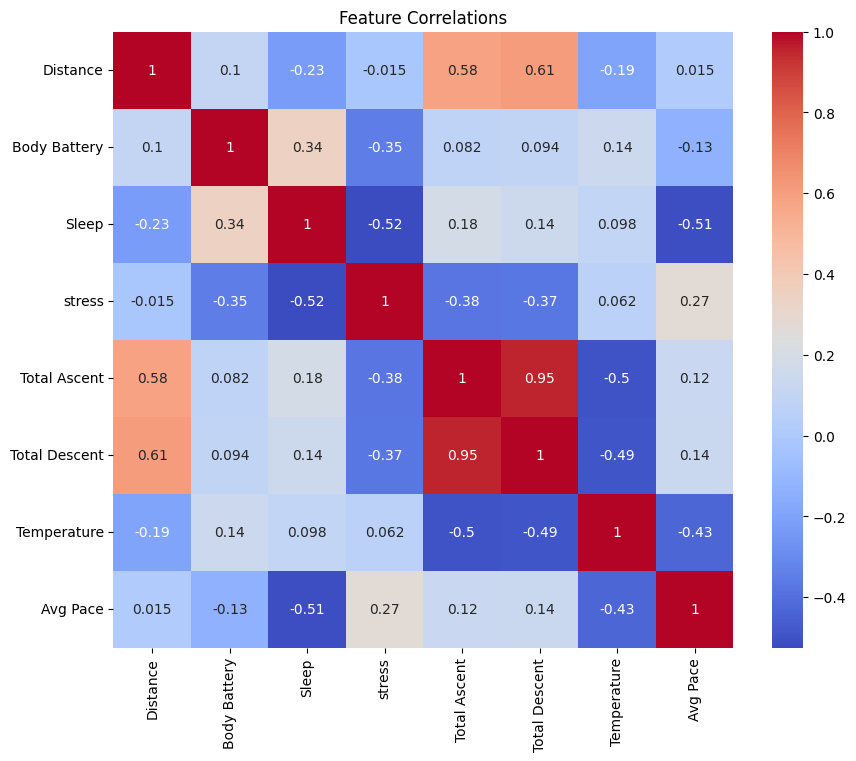

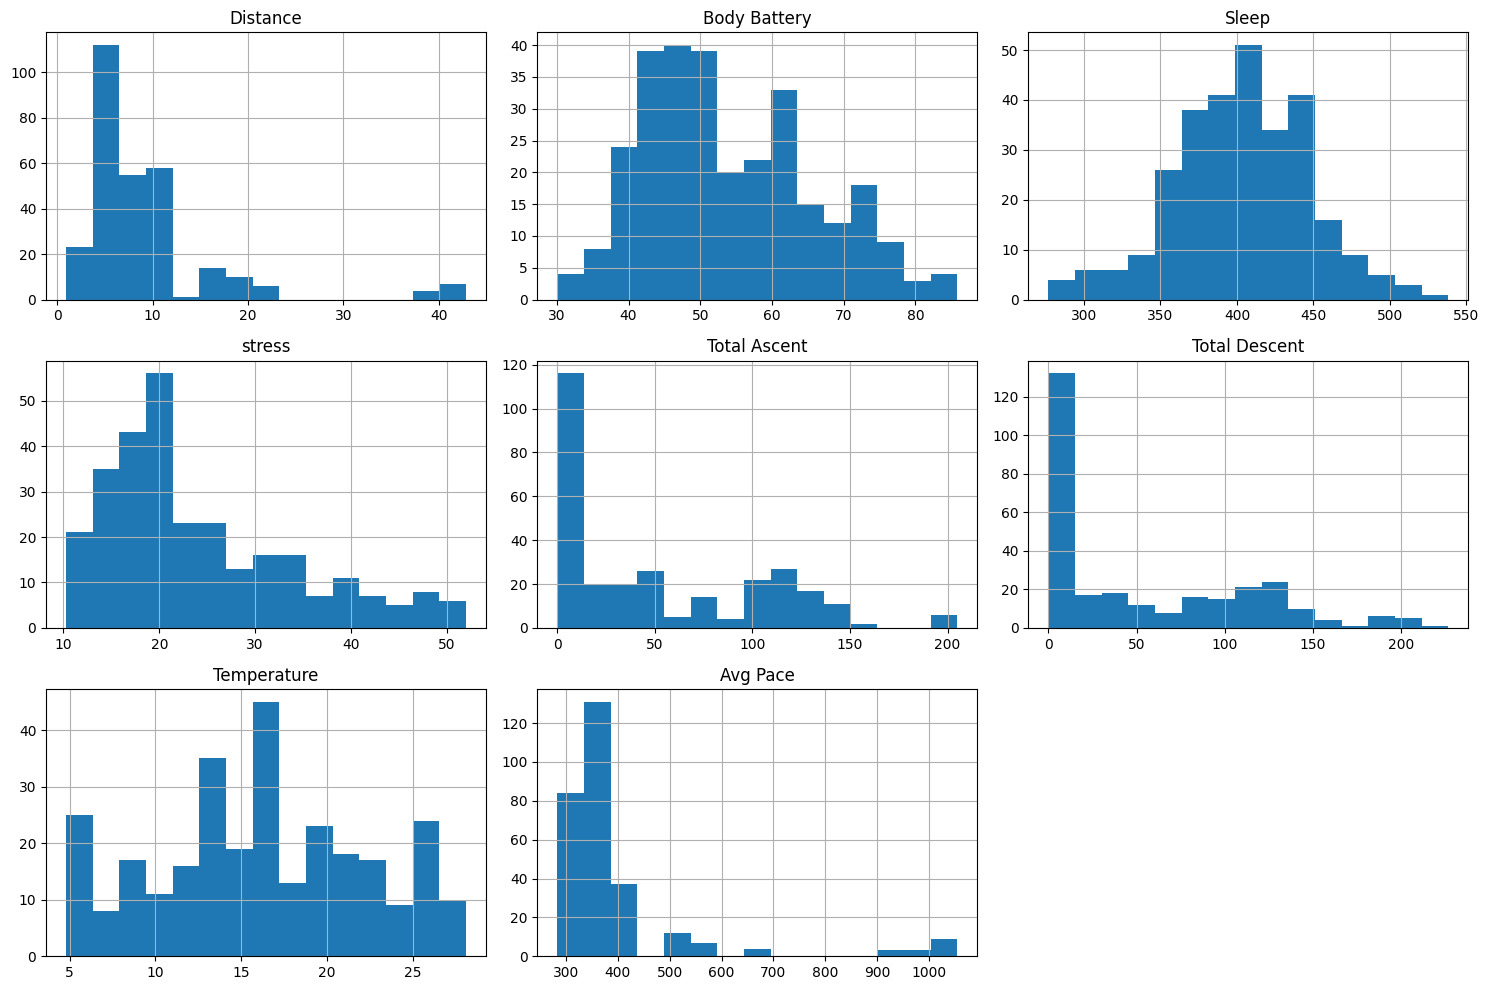

   Distance  Body Battery  Sleep  stress  Total Ascent  Total Descent  \
0      5.00          52.0  400.0    43.0          37.0           32.0   
1      5.01          62.0  430.0    20.0          22.0           20.0   
2      5.00          77.0  441.0    13.0          40.0           38.0   
3      5.01          84.0  486.0    14.0          49.0           48.0   
4      5.00          78.0  457.0    15.0          52.0           49.0   

   Temperature  Avg Pace  
0         25.5     319.0  
1         26.3     319.0  
2         22.7     343.0  
3         18.1     337.0  
4         11.6     359.0  
Epoch 50, Loss: 5509.7358
Epoch 100, Loss: 2304.9812
Epoch 150, Loss: 652.8839
Epoch 200, Loss: 290.3971
Epoch 250, Loss: 234.7222
Epoch 300, Loss: 205.4306
Epoch 350, Loss: 196.5389
Epoch 400, Loss: 905.4208
Epoch 450, Loss: 154.0820
Epoch 500, Loss: 134.2558
MSE: 1374.619231397909
R2: 0.9449072869210725


In [1]:
from preprocessing import preprocess
from train import train_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import torch
import joblib

df = pd.read_csv("../data/Activities-6-2-2.csv")
X_train, X_test, y_train, y_test = preprocess(df)
model, mse, r2 = train_model(X_train, y_train, X_test, y_test)

print("MSE:", mse)
print("R2:", r2)

In [2]:
# Make sure model is in eval mode
model.eval()

# Prepare new input
X_new = np.array([[5, 50, 420, 30, 18.0, 35, 30]])
scaler = joblib.load("scaler.save")
X_new_scaled = scaler.transform(X_new)
X_new_tensor = torch.tensor(X_new_scaled, dtype=torch.float32)

# Predict
with torch.no_grad():
    y_pred = model(X_new_tensor).numpy().flatten()

print("Predicted:", y_pred)

Predicted: [385.3106]


In [2]:
from map import geocode_address

lon, lat = geocode_address("Bischofstraße 15, Aachen, Germany")

In [3]:
from dotenv import load_dotenv
import os

load_dotenv()  # load .env file

ORS_API_KEY = os.environ["ORS_API_KEY"]
print(ORS_API_KEY)

eyJvcmciOiI1YjNjZTM1OTc4NTExMTAwMDFjZjYyNDgiLCJpZCI6IjEzNWMxYTFkMTA1YjRmMTM4NjVlNzM3OTZhOGQwMTgyIiwiaCI6Im11cm11cjY0In0=


In [5]:
from map import route_plan

coordinates, m = route_plan(ORS_API_KEY, lon, lat)
m

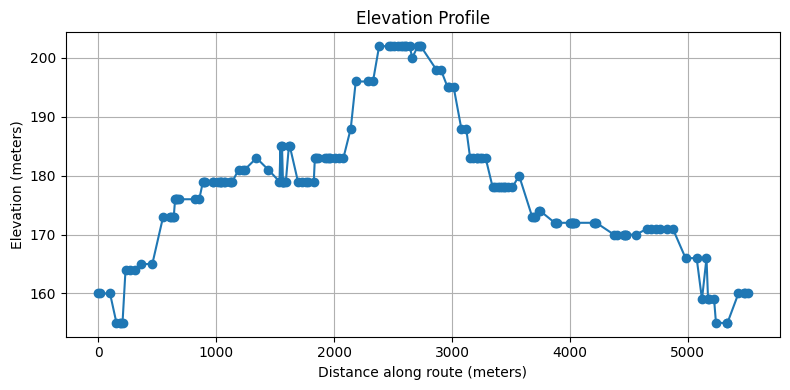

In [5]:
from map import elevation

elevations = elevation(coordinates)

In [6]:
from map import des_asc

total_ascent, total_descent = des_asc(elevations)
print("Total ascent:", total_ascent)
print("Total descent:", total_descent)

Total ascent: 87.0
Total descent: 87.0


NameError: name 'elevations' is not defined

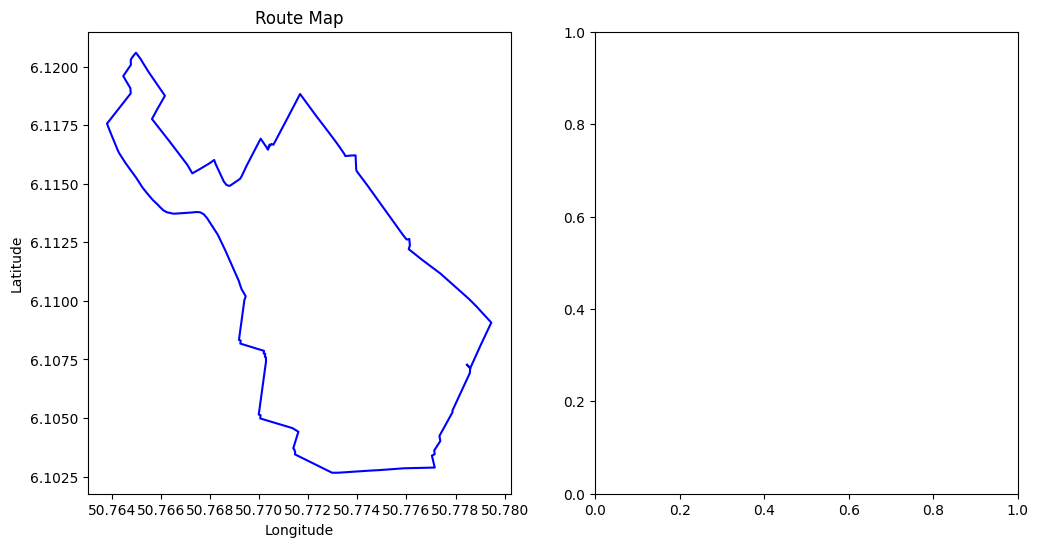

In [6]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from geopy.distance import geodesic


# Compute cumulative distance
distances = [0.0]
for i in range(1, len(coordinates)):
    d = geodesic(coordinates[i - 1], coordinates[i]).meters
    distances.append(distances[-1] + d)

# Create figure with 2 subplots
fig, (ax_map, ax_elev) = plt.subplots(1, 2, figsize=(12, 6))

# Map plot: base route
lats, lons = zip(*coordinates)
(route_line,) = ax_map.plot(lons, lats, "b-", label="Route")
(point_marker,) = ax_map.plot([], [], "ro", markersize=8)
ax_map.set_title("Route Map")
ax_map.set_xlabel("Longitude")
ax_map.set_ylabel("Latitude")

# Elevation plot
(elev_line,) = ax_elev.plot(distances, elevations, "b-")
(elev_marker,) = ax_elev.plot([], [], "ro", markersize=8)
ax_elev.set_title("Elevation Profile")
ax_elev.set_xlabel("Distance (m)")
ax_elev.set_ylabel("Elevation (m)")


# Animation update function
def update(frame):
    # Update map point
    point_marker.set_data(lons[frame], lats[frame])
    # Update elevation point
    elev_marker.set_data(distances[frame], elevations[frame])
    return point_marker, elev_marker


# Create animation
ani = FuncAnimation(fig, update, frames=len(coordinates), interval=200, blit=True)

plt.tight_layout()
plt.show()

# Optional: Save to mp4 or gif
# ani.save("route_animation.mp4", writer="ffmpeg")